In [1]:
import gym
from gym.envs.registration import register


max_episode_steps = 2000
register(
    id="FurutaPendulum-v0",
    entry_point="furuta_pendulum_full:FurutaPendulumEnv",
    max_episode_steps=max_episode_steps,
)


def simulate(action):
    env = gym.make("FurutaPendulum-v0", render_mode="human")
    env.reset()
    obs = env.reset_model()

    observations = []
    rewards = []

    for _ in range(max_episode_steps):
        obs, reward, done, info, _ = env.step([action])
        observations.append(obs)
        rewards.append(reward)
        env.render()
        if done:
            break
    env.close()

    return observations, rewards

In [3]:
import matplotlib.pyplot as plt

def plot_observations(observations):
    for i in [0, 2, 4]:
        plt.figure(figsize=(12, 8))
        plt.plot([x[i] for x in observations])
        plt.plot([x[i + 1] for x in observations])
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_rewards(rewards):
    plt.figure(figsize=(12, 8))
    plt.plot(rewards)
    plt.legend()
    plt.grid(True)
    plt.show()

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/pendulum/.local/lib/python3.10/site-packages/gym/spaces/box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argu

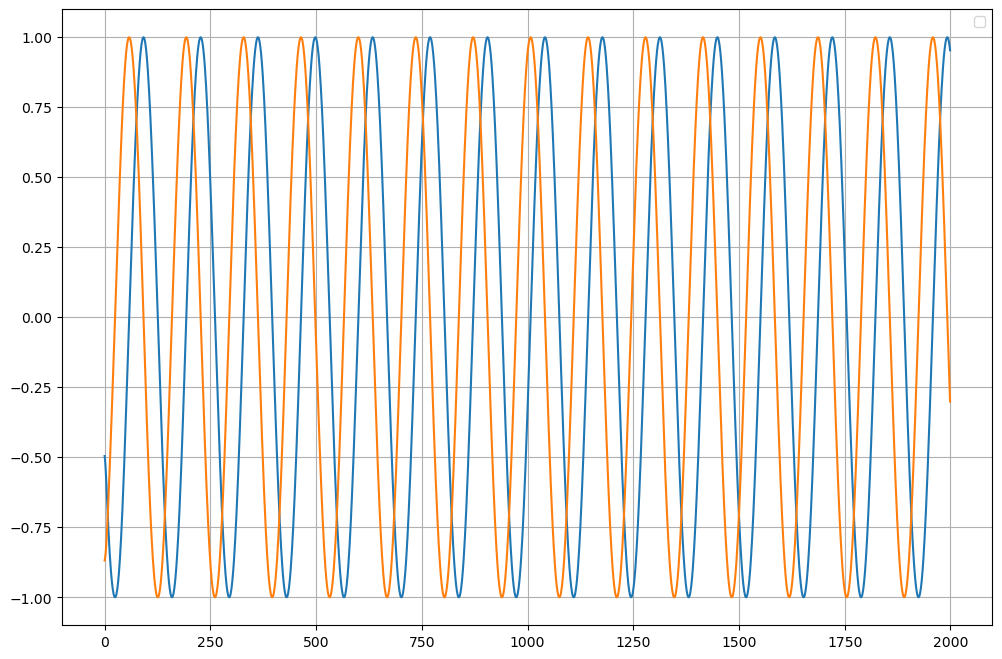

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


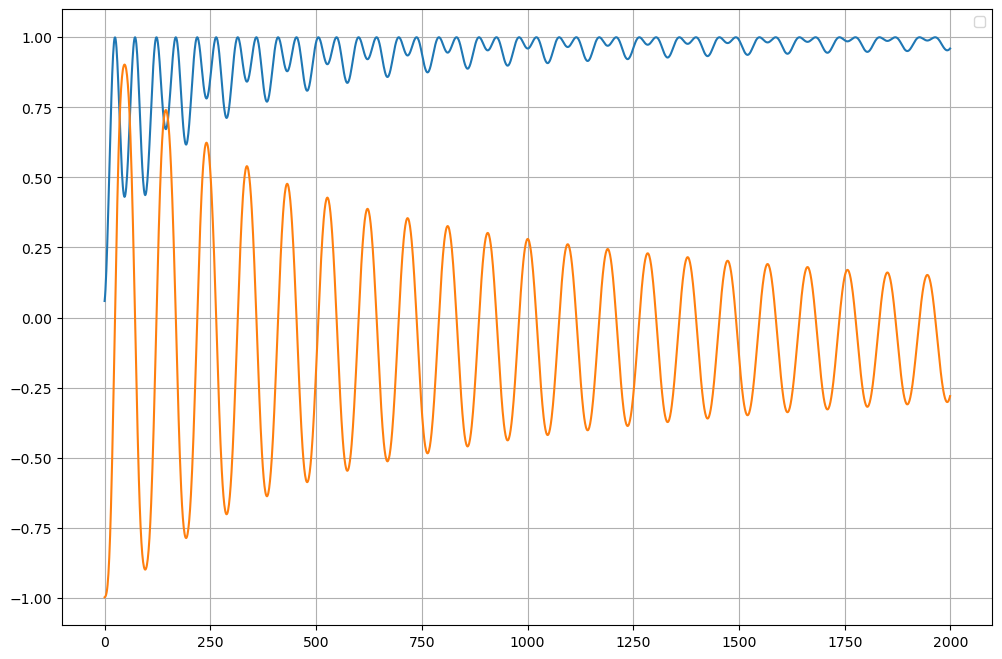

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


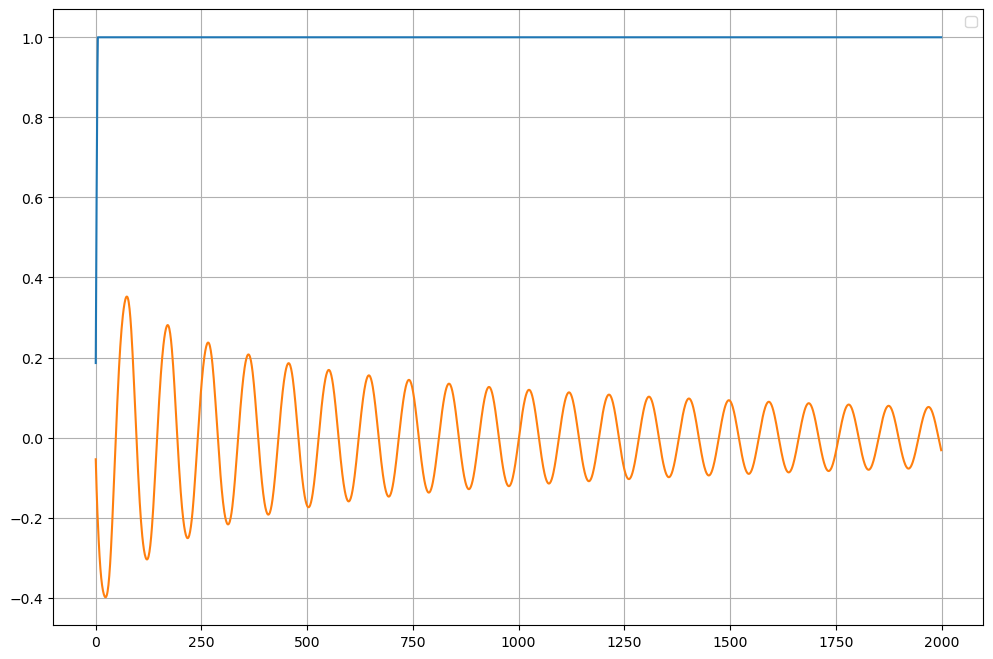

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


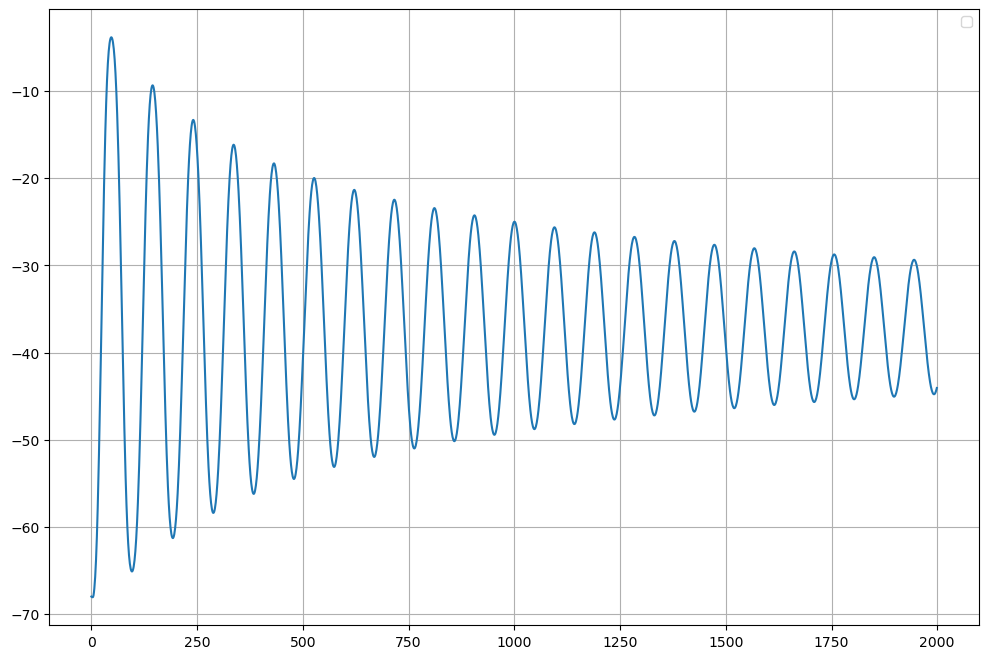

In [7]:
observations, rewards = simulate(0.43)
plot_observations(observations)
plot_rewards(rewards)

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/pendulum/.local/lib/python3.10/site-packages/gym/spaces/box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argu

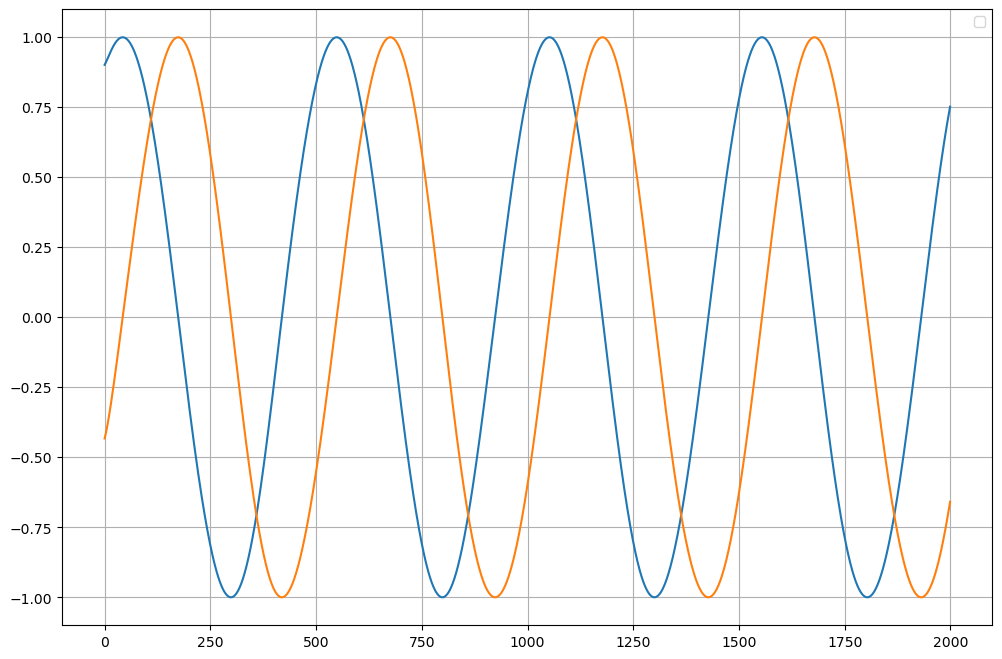

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


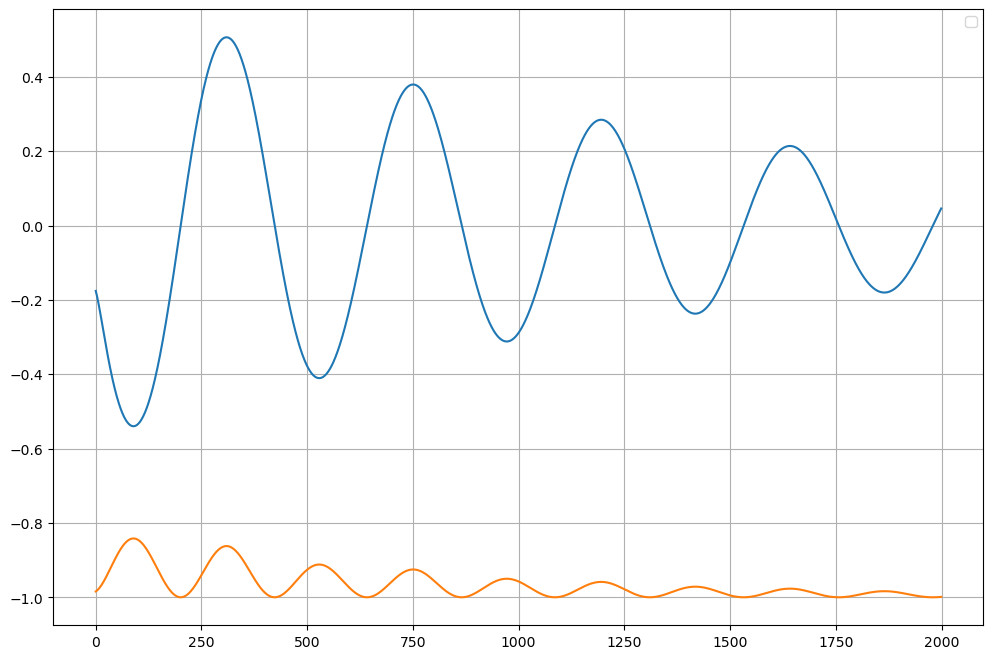

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


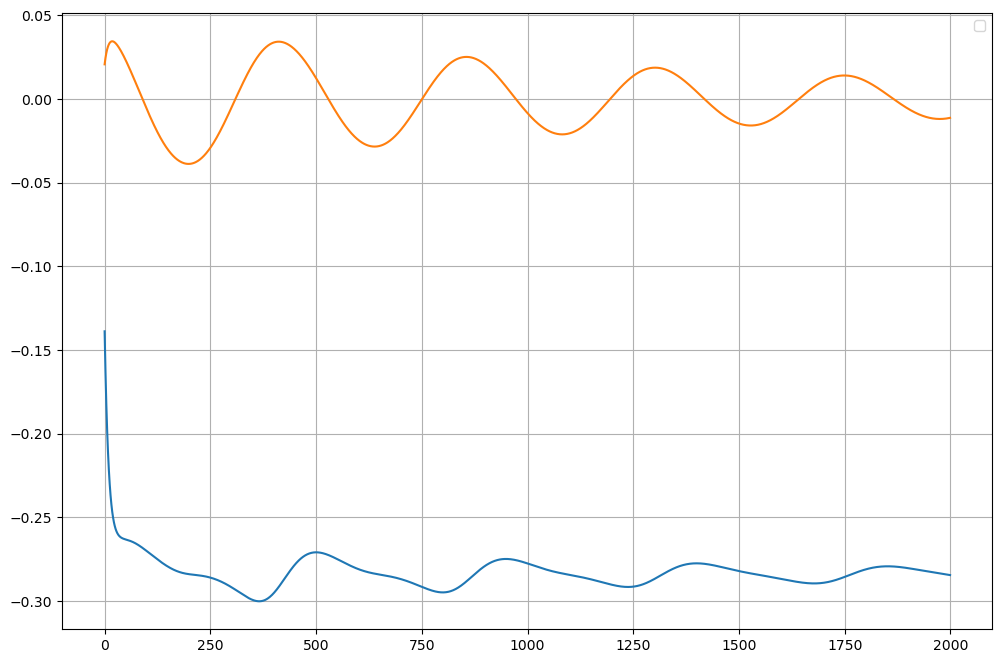

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


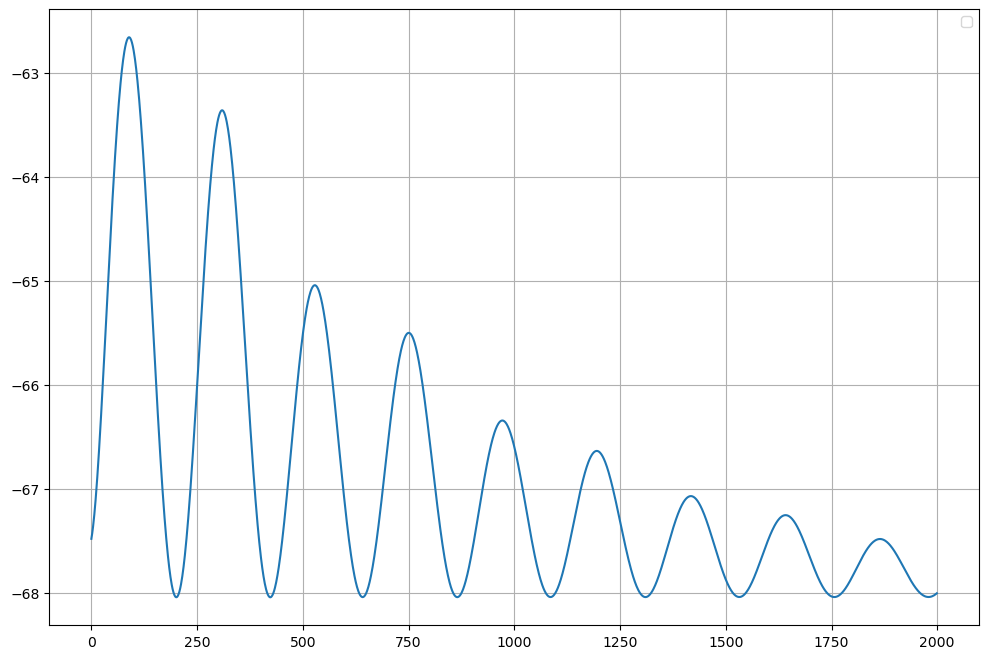

In [10]:
observations, rewards = simulate(-0.05)
plot_observations(observations)
plot_rewards(rewards)

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


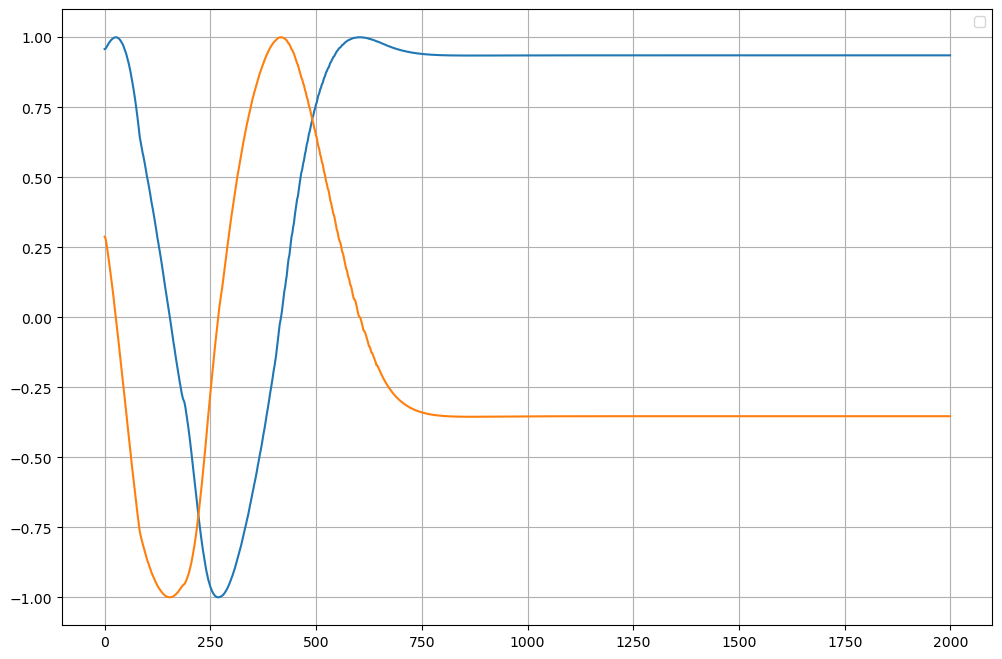

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


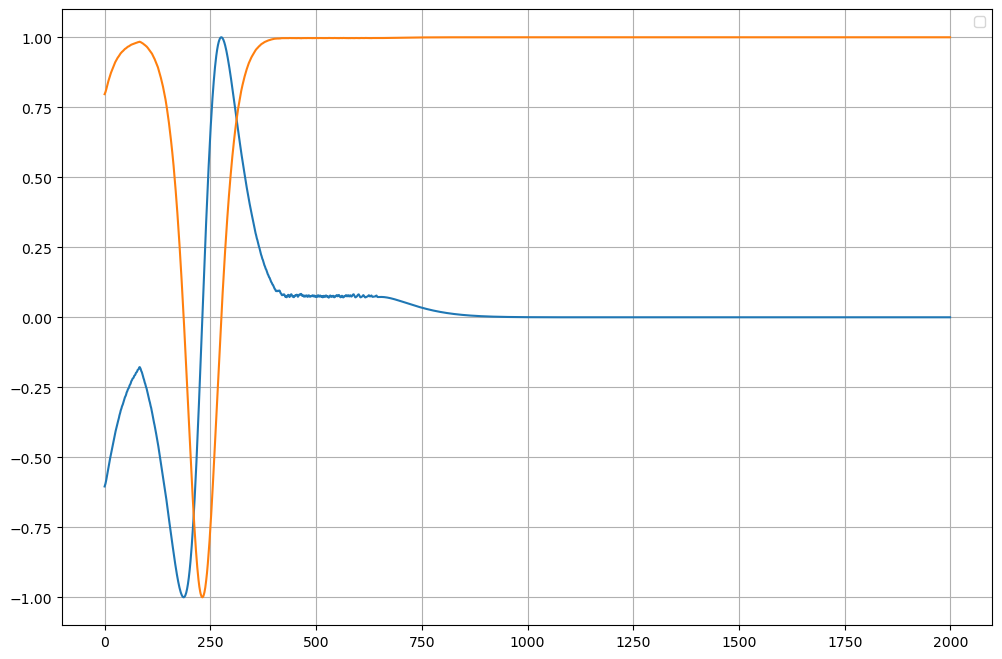

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


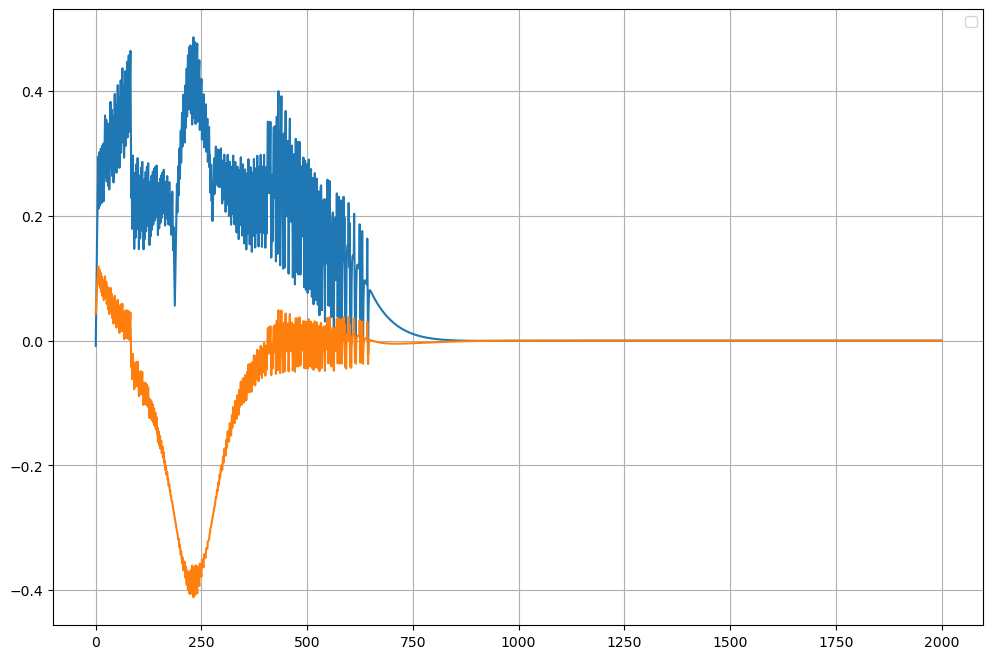

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


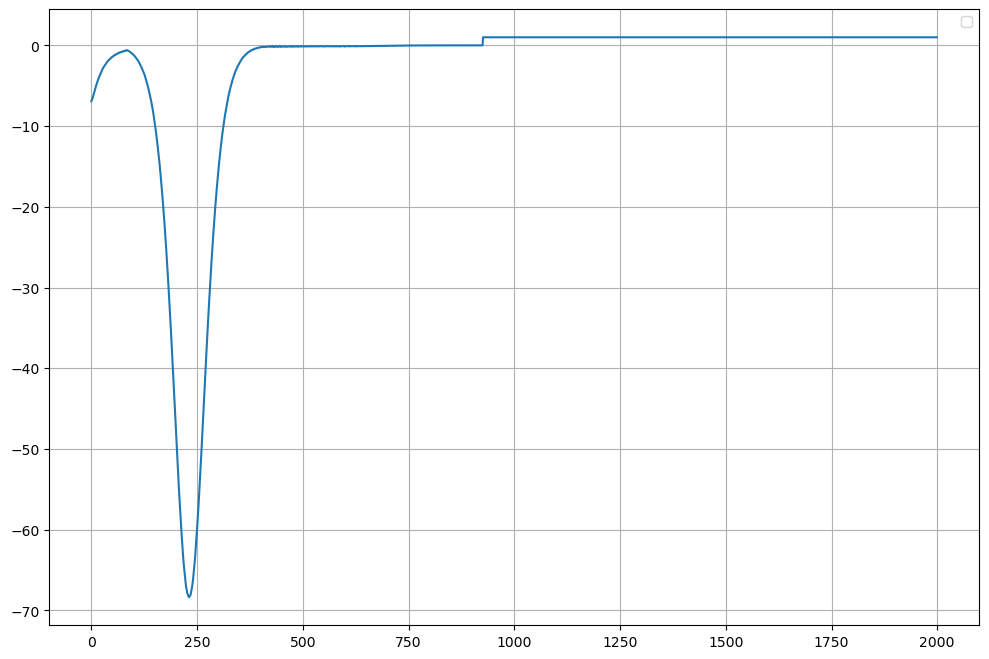

In [4]:
from lqr_expert import LQRExpert


def simulate_expert():
    env = gym.make("FurutaPendulum-v0", render_mode="human")
    env.reset()
    obs = env.reset_model()

    observations = []
    rewards = []
    lqr_expert = LQRExpert()

    for _ in range(max_episode_steps):
        action = lqr_expert([obs])
        obs, reward, done, info, _ = env.step(action[0][0])
        observations.append(obs)
        rewards.append(reward)
        env.render()
        if done:
            break
    env.close()

    return observations, rewards


observations, rewards = simulate_expert()
plot_observations(observations)
plot_rewards(rewards)